In [1]:
import os
import numpy as np
from skimage import io, transform
from PIL import Image, ImageEnhance
import tensorflow as tf
import keras
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Flatten, LeakyReLU, Activation, Reshape, Input
from keras.layers import Conv2D, Conv2DTranspose, Lambda, Concatenate
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras import backend as K
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
def dick(x):
    x = K.expand_dims(x, axis=1)
    x = K.expand_dims(x, axis=2)
    x = K.tile(x, [1, 4, 4, 1])
    return x

class dcgan():
    def __init__(self):
        self.dis_depth = 64
        self.gen_depth = 512
        self.alpha = 0.2
        self.dim = 4
        self.batch = 64
        self.epochs = 300
            
    def load_model(self, number):
        self.generatorModel = load_model("model_adam_best/generator%d.h5"%number, custom_objects={'dick':dick})
        self.discriminatorModel = load_model("model_adam_best/discriminator%d.h5"%number, custom_objects={'dick':dick})
dcgan = dcgan()

In [3]:
dcgan.load_model(299)

/usr/local/lib/python2.7/dist-packages/keras/models.py:252: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
hair = ['orange', 'white', 'aqua', 'gray', 'green', 'red', 'purple', 'pink', 'blue', 'black', 'brown', 'blonde']
eyes = ['gray', 'black', 'orange', 'pink', 'yellow', 'aqua', 'purple', 'green', 'brown', 'red', 'blue']

In [5]:
vecs = []
for i in range(len(hair)):
    for j in range(len(eyes)):
        a = np.zeros([23,])
        a[i] = 1
        a[12+j] = 1
        vecs.append(a)
vecs = np.array(vecs)
print(vecs.shape)

(132, 23)


In [6]:

noise = np.random.normal(0, 1.0, size=[132,100])
#noise = np.tile(noise,[132,1])
images = dcgan.generatorModel.predict([noise, vecs])


In [52]:
nn = np.array([noise[4],noise[17],noise[43],noise[57],noise[120]])
# np.save('golden_noise_299.npy',nn)
images = dcgan.generatorModel.predict([np.tile(nn[4],[132,1]), vecs])
# # images = dcgan.generatorModel.predict([noise, vecs])
# nn = np.load("golden_noise_299.npy")
# images = dcgan.generatorModel.predict([np.tile(nn[3],[132,1]), vecs])


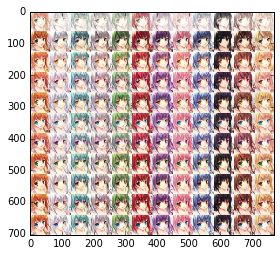

In [51]:
from matplotlib import pyplot as plt

width = 11
height = 12
new_im = Image.new('RGB', (64*height,64*width))
for ii in range(height):
    for jj in range(width):
        index=ii*width+jj
        image = (images[index]/2+0.5)*255
        image = image.astype(np.uint8)
        new_im.paste(Image.fromarray(image,"RGB"), (64*ii,64*jj))
new_im.save('test.png')
plt.imshow(new_im)
plt.show()

In [45]:
a = np.zeros([5,23])
a[:,hair.index('red')]=1
a[:,len(hair)+eyes.index('green')]=1
# lines = ['%s hair, %s eyes'%('red', 'green')]*36
# vecp = encoder.encode(lines)

In [46]:
images = dcgan.generatorModel.predict([nn, a])

In [47]:
for i in range(5):
    new_im = Image.new('RGB', (64,64))
    image = (images[i]/2+0.5)*255
    image = image.astype(np.uint8)
    new_im.paste(Image.fromarray(image,"RGB"), (0,0))
    new_im.save('early/sample_1_%d.png'%i)